# **Implement a Breadth-first Search Algorithm**
MSDS 432 Module 6

Nameyeh Alam

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string
import warnings
warnings.filterwarnings("ignore", category=Warning)
import time

#### 1. Create a five level 'connections' graph (all unique, no duplicates)
- The first level should have five people and each person in first level should have five connections (they can be exclusive to one person or shared with other members on the same level, but all five should be unique, no duplicates)
- Each person in the second level should have five connections (they can be exclusive to one person or shared with other members on the same level, but all five should be unique, no duplicates)
- Continue the same for third, fourth, and fifth levels
- There should be no reverse connections (i.e. first level can connect to second level but second cannot have any reverse connection with the first, and so on for 3rd, 4th, and 5th levels)

In [2]:
graph = {}
# level one 
graph["you"] = ["jake", "mallory", "donna", "phoebe", "jon"]

graph["jake"] = ["amy","rosa","gina","boyle","holt"]
graph["mallory"] = ["amy","rosa","gina","boyle","holt"]
graph["donna"] = ["amy","rosa","gina","boyle","holt"]
graph["phoebe"] = ["amy","rosa","gina","boyle","holt"]
graph["jon"] = ["amy","rosa","gina","boyle","holt"]
# level two
graph["amy"] = ["grace", "frankie","brianna","bud","coyote"]
graph["rosa"] = ["grace", "frankie","brianna","bud","coyote"]
graph["gina"] = ["grace", "frankie","brianna","bud","coyote"]
graph["boyle"] = ["grace", "frankie","brianna","bud","coyote"]
graph["holt"] = ["grace", "frankie","brianna","bud","coyote"]
# level three
graph["grace"] = ["leslie","ron","ann","april","andy"]
graph["frankie"] = ["leslie","ron","ann","april","andy"]
graph["brianna"] = ["leslie","ron","ann","april","andy"]
graph["bud"] = ["leslie","ron","ann","april","andy"]
graph["coyote"] = ["leslie","ron","ann","april","andy"]
# level four
graph["leslie"] = ["monica","chandler","ross","rachel","joey"]
graph["ron"] = ["monica","chandler","ross","rachel","joey"]
graph["ann"] = ["monica","chandler","ross","rachel","joey"]
graph["april"] = ["monica","chandler","ross","rachel","joey"]
graph["andy"] = ["monica","chandler","ross","rachel","joey"]
# level five 
graph["monica"] = ["arya","sansa","dany","brienne","tyrion"]
graph["chandler"] = ["arya","sansa","dany","brienne","tyrion"]
graph["ross"] = ["arya","sansa","dany","brienne","tyrion"]
graph["rachel"] = ["arya","sansa","dany","brienne","tyrion"]
graph["joey"] = ["arya","sansa","dany","brienne","tyrion"]
# level six - terminal nodes 
graph["arya"] = []
graph["sansa"] = []
graph["dany"] = []
graph["brienne"] = []
graph["tyrion"] = []

#### 2. Now search for three people on each level and capture the time for each search

In [3]:
from collections import deque
def search(name):
        search_queue = deque()
        search_queue += graph[name]
        # This array is how you keep track of which people you've searched before.
        searched = []
        while search_queue: # while the queue is not empty
            person = search_queue.popleft() # grabs the first person off the queue
            # Only search this person if you haven't already searched them.
            if person not in searched:
                if person == search_name:
                    print(search_name+" found!")
                    return True
                else:
                    search_queue += graph[person]
                    # Marks this person as searched
                    searched.append(person)
        print("sorry, "+str(search_name)+" not found :( ")
        return False
    
search_name = 'harry'
search("you")

search_list = ['harry','ron','hermione']
for x in search_list: 
    search_name = x 
    search("you")

sorry, harry not found :( 
sorry, harry not found :( 
ron found!
sorry, hermione not found :( 


In [4]:
level1 = ["jake", "mallory", "donna"]
level2 = ["grace", "frankie","brianna"]
level3 = ["leslie","ron","ann"]
level4 = ["monica","chandler","ross"]
level5 = ["arya","sansa","dany"]
all_levels = [level1,level2,level3,level4,level5]
for x in range(len(all_levels)): 
    print(all_levels[x])

['jake', 'mallory', 'donna']
['grace', 'frankie', 'brianna']
['leslie', 'ron', 'ann']
['monica', 'chandler', 'ross']
['arya', 'sansa', 'dany']


In [5]:
search_times=[]
level_list=[]
names_list =[]
for x in range(len(all_levels)): 
    print("Level "+str(x+1))
    import time
    for i in range(len(all_levels[x])):
        start = time.perf_counter()
        search_name = all_levels[x][i]
        search("you")
        end = time.perf_counter()
        search_time = (end - start)*1000 # convert to milliseconds 
        search_times.append(search_time)
        names_list.append(search_name)
        level_list.append("Level "+str(x+1))
    print("---------------")

Level 1
jake found!
mallory found!
donna found!
---------------
Level 2
grace found!
frankie found!
brianna found!
---------------
Level 3
leslie found!
ron found!
ann found!
---------------
Level 4
monica found!
chandler found!
ross found!
---------------
Level 5
arya found!
sansa found!
dany found!
---------------


In [6]:
search_times

[0.04121199999995717,
 0.02666600000011954,
 0.025696999999880177,
 0.040728000000100906,
 0.03975700000014015,
 0.04169700000011822,
 0.09066700000004424,
 0.044605999999891566,
 0.06448399999992027,
 0.13090899999990135,
 0.12896900000014533,
 0.08824299999998786,
 0.06448400000014232,
 0.49987899999992536,
 0.24727199999996508]

In [12]:
# level_list
# names_list

#### 3. Organize the results of the study into an table showing the 'name' that you searched for, the level of the search (first, second, third, fourth, fifth), and the time it took.  Discuss any findings.


In [8]:
df=pd.DataFrame({'Name':names_list,
                 'Level':level_list,
                 'Search_Time':search_times})
df

,Name,Level,Search_Time
0,jake,Level 1,0.041212
1,mallory,Level 1,0.026666
2,donna,Level 1,0.025697
3,grace,Level 2,0.040728
4,frankie,Level 2,0.039757
5,brianna,Level 2,0.041697
6,leslie,Level 3,0.090667
7,ron,Level 3,0.044606
8,ann,Level 3,0.064484
9,monica,Level 4,0.130909


#### 4. Using the average time for each level, create a plot and compare times at each level (five bars or any other suitable visual).  Discuss any findings.

In [9]:
mean_times = df.groupby("Level")["Search_Time"].mean().tolist()

In [10]:
df=pd.DataFrame({'Level':['Level 1', 'Level 2', 
                          'Level 3', 'Level 4', 'Level 5'],
                 'Mean_Search_Time':mean_times})
df

,Level,Mean_Search_Time
0,Level 1,0.031192
1,Level 2,0.040727
2,Level 3,0.066586
3,Level 4,0.116040
4,Level 5,0.270545


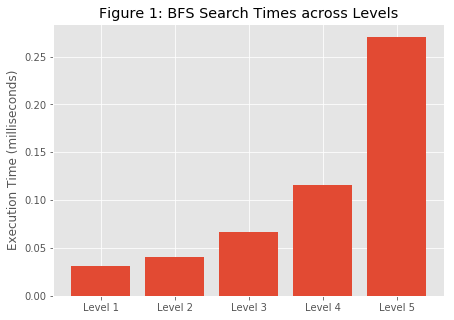

In [11]:
plt.style.use('ggplot')
plt.figure(figsize = (7,5))
plt.bar( 'Level', 'Mean_Search_Time', data=df)
plt.ylabel('Execution Time (milliseconds)')
plt.title('Figure 1: BFS Search Times across Levels')
# plt.legend()
plt.show()
plt.close()

In Figure 1, we can see that search time increases as we progress through the five levels.

## Executive Summary

In this assignment, we compared search times across five levels of a graph. A graph is a container that models a set of connections or relationships, made up of nodes and edges. In this case, names were the nodes, and connections were the edges. 

The way that Breadth First Search (BFS) algorithm works, is that it first determines whether or not a path from node A to node B exists, and if yes, it figures out the shortest path from A to B. BFS uses a node-based approach, where each node is stored in a queue that follows first in, first out. Data engineers should consider using BFS when the target solution is closer to the starting point. 

In terms of Big O time complexity, the running time for BFS is O(number of nodes + number of edges), so the more nodes and edges or connections we have, the larger the Big O time complexity will be for BFS. This is exactly what we see in Figure 1. As the level increases, the number of nodes we have to search through increases, resulting in longer execution times. So for example, if we know that a solution is likely to be far from our starting point, BFS will likely be inefficient; instead, something like DFS (Depth First Search) might be more appropriate. 
